In [169]:
#Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("./data.csv")
df[0::10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
20,0,0.485253,0.545573,0.534665,0.622177,0.622256,0.999065,0.797522,0.809406,0.303554,...,0.804639,0.014039,0.623922,0.622177,0.840639,0.277988,0.026794,0.565171,1,0.039507
30,1,0.462195,0.536034,0.514428,0.599987,0.599987,0.998909,0.797291,0.809223,0.303477,...,0.787082,0.001631,0.621876,0.599984,0.838259,0.297038,0.024886,0.576473,1,0.014562
40,0,0.507824,0.571631,0.549226,0.625326,0.625326,0.999136,0.797542,0.809413,0.303442,...,0.815731,0.007173,0.623729,0.625327,0.841574,0.279236,0.026908,0.565659,1,0.031485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0,0.435967,0.498692,0.486054,0.603626,0.603626,0.998893,0.797239,0.809179,0.303421,...,0.773759,0.001563,0.623994,0.603624,0.838736,0.276539,0.026787,0.565138,1,0.062338
6780,0,0.520402,0.586295,0.567910,0.610545,0.610343,0.999095,0.797565,0.809454,0.303567,...,0.827839,0.003365,0.624445,0.610541,0.841969,0.276784,0.026791,0.565160,1,0.056275
6790,0,0.474333,0.530637,0.524653,0.599281,0.599353,0.998958,0.797356,0.809287,0.303489,...,0.791776,0.000581,0.622525,0.599277,0.839482,0.287351,0.025696,0.707735,1,0.017872
6800,0,0.438210,0.493295,0.484769,0.619762,0.619784,0.998926,0.797223,0.809153,0.303323,...,0.772423,0.000526,0.623801,0.619757,0.838684,0.276378,0.026774,0.565077,1,0.067287


# Data Analysis

# Check if our data has duplicate data

In [171]:
df.duplicated(keep=False).sum()

0

# Check if our data has any null values

In [172]:
df.isnull().values.sum()

0

# The data consist of only int64 and float64 data types

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [174]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [175]:
#feature columns
X = df.drop('Bankrupt?', axis=1)

#label column
y = df['Bankrupt?']

# The data is imbalanced and needs to balanced

0    6599
1     220
Name: Bankrupt?, dtype: int64


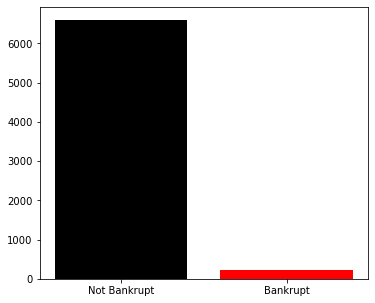

In [176]:
#we have inbalanced data
print(df['Bankrupt?'].value_counts())

no = df['Bankrupt?'].value_counts()[0]
yes = df['Bankrupt?'].value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# We use SMOTE(Synthetic Minority Oversampling Technique) to correct the imbalance of our data.

In [177]:
#pip install -U imbalanced-learn

# transform the dataset using smote oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    6599
0    6599
Name: Bankrupt?, dtype: int64


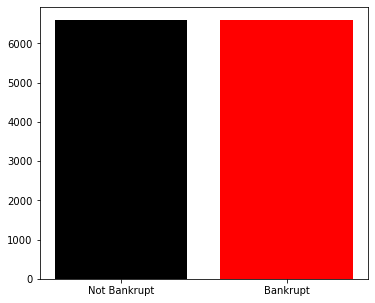

In [178]:
print(y.value_counts())

yes = y.value_counts()[0]
no = y.value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# Split our data into training and testing variables

In [179]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(9238, 95)
(9238,)
(3960, 95)
(3960,)


# KNN

In [180]:
# Instantiating another "object" of KNeighborsClassifier "class" with k=3:
k = 3
bankrupt_knn = KNeighborsClassifier(n_neighbors=k)

# Training ONLY on the training set:
bankrupt_knn.fit(X_train, y_train)

# Testing on the testing set:
y_predict_knn = bankrupt_knn.predict(X_test)

In [181]:
# Accuracy Evaluation
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print(accuracy_knn)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_knn = bankrupt_knn.predict_proba(X_test)

0.9186868686868687


In [182]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_knn)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_knn)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_knn[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 0 1]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[0. 1. 0. ... 1. 0. 1.]


In [183]:
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)

print(fpr_KNN)
print(tpr_KNN)

# AUC:
AUC = metrics.auc(fpr_KNN, tpr_KNN)
print(AUC)

[0.         0.06503252 0.14607304 0.2076038  1.        ]
[0.         0.93472718 0.98470168 0.99388067 1.        ]
0.9590131628792469


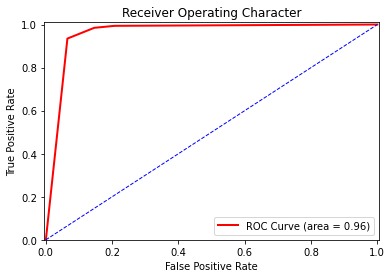

In [184]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_KNN, tpr_KNN, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Character')
plt.legend(loc="lower right")

plt.show()

# Logistic Regression Classifier:

In [185]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 

bankrupt_logreg = LogisticRegression(max_iter=2000)

# Training ONLY on the training set:
bankrupt_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_logreg = bankrupt_logreg.predict(X_test)

In [186]:
# Accuracy Evaluation
accuracy = accuracy_score(y_test, y_predict_logreg)
print(accuracy)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = bankrupt_logreg.predict_proba(X_test)

0.6095959595959596


In [187]:
# Likelihood Overview
print(y_test)

print(y_predict_logreg)

# "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 0 0 ... 0 0 1]
[[0.59839861 0.40160139]
 [0.5607823  0.4392177 ]
 [0.51318299 0.48681701]
 ...
 [0.61990549 0.38009451]
 [0.58362881 0.41637119]
 [0.32874978 0.67125022]]
[0.40160139 0.4392177  0.48681701 ... 0.38009451 0.41637119 0.67125022]


In [188]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr2)
print(tpr2)

# AUC:
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

[0.         0.         0.         ... 0.97648824 0.97648824 1.        ]
[0.         0.00764916 0.01478837 ... 0.99949006 1.         1.        ]
0.6626701928220612


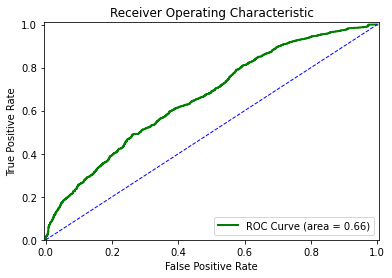

In [189]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

# Random  Forest Classifier:

In [190]:
bankrupt_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# Training ONLY on the training set:
bankrupt_RandomForest.fit(X_train, y_train)

# Testing on the testing set:
y_predict_randomforest = bankrupt_RandomForest.predict(X_test)

In [191]:
# Accuracy Evaluation
accuracy_randomforest = accuracy_score(y_test, y_predict_randomforest)
print(accuracy_randomforest)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = bankrupt_RandomForest.predict_proba(X_test)

0.9785353535353535


In [192]:
# Likelihood Overview
print(y_test)

print(y_predict_randomforest)

# "estimated likelihood of both label" for the testing set:
print(y_predict_prob_rf)

# "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_rf[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 1 1]
[[1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.         1.        ]
 [0.21052632 0.78947368]
 [0.10526316 0.89473684]]
[0.         1.         0.         ... 1.         0.78947368 0.89473684]


In [193]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

print(fpr3)
print(tpr3)

# AUC:
AUC3 = metrics.auc(fpr3, tpr3)
print(AUC3)

[0.         0.002001   0.0030015  0.006003   0.00850425 0.014007
 0.018009   0.02251126 0.02601301 0.03001501 0.03451726 0.04602301
 0.05902951 0.07353677 0.09354677 0.11555778 0.14207104 0.18409205
 0.24962481 0.37418709 1.        ]
[0.         0.57878633 0.77613463 0.85619582 0.91483937 0.94186639
 0.96124426 0.97297297 0.9790923  0.98521163 0.9918409  0.99643039
 0.99796022 0.99796022 0.99847017 0.99949006 1.         1.
 1.         1.         1.        ]
0.9962755472585859


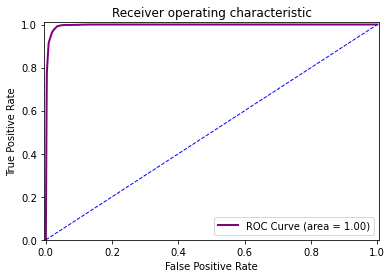

In [194]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr3, tpr3, color='purple', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# SVM (Support Vector Machine)

In [195]:
svm = SVC(probability=True)
# Training ONLY on the training set:
svm.fit(X_train, y_train)

# Testing on the testing set:
y_predict_svm = svm.predict(X_test)

#find accuracy of svm
score_svm = accuracy_score(y_test, y_predict_svm)
print("Accuracy for SVM: %.2f%%" % (score_svm * 100.0))


Accuracy for SVM: 81.24%


In [196]:
#AUC

#Estimates the probability of each label
y_predict_prob_SVM = svm.predict_proba(X_test)

# calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr_SVM,tpr_SVM,thresholds_SVM = metrics.roc_curve(y_test,y_predict_prob_SVM[:,1],pos_label=1)

# AUC:
AUC_SVM = metrics.auc(fpr_SVM, tpr_SVM)
print('AUC for SVM:', AUC_SVM)

AUC for SVM: 0.8921181651509078


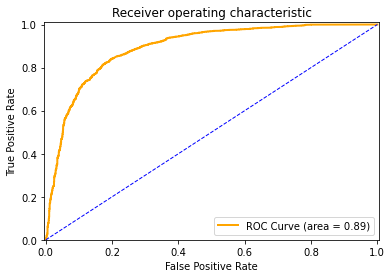

In [197]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_SVM)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# XGBoost

In [198]:
# In the following line, "my_XGBoost" is instantiated as an "object" of XGBClassifier "class".
my_XGBoost = XGBClassifier()

my_XGBoost.fit(X_train, y_train)

#uses method predict of the trained object
y_predict_XGBoost = my_XGBoost.predict(X_test)

# Function "accuracy_score" returns percentage of correct predictions
score_XGBoost = accuracy_score(y_test, y_predict_XGBoost)

print("Accuracy for XGBoost: %.2f%%" % (score_XGBoost * 100.0))

Accuracy for XGBoost: 98.66%


In [199]:
#AUC

#Estimates the probability of each label
y_predict_prob_XGBoost = my_XGBoost.predict_proba(X_test)

# calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr_XGBoost,tpr_XGBoost,thresholds_XGBoost = metrics.roc_curve(y_test,y_predict_prob_XGBoost[:,1],pos_label=1)

# AUC:
AUC_XGBoost = metrics.auc(fpr_XGBoost, tpr_XGBoost)
print('AUC for XGBoost:', AUC_XGBoost)

AUC for XGBoost: 0.9992433748745867


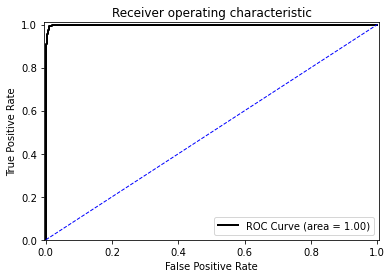

In [200]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_XGBoost, tpr_XGBoost, color='black', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_XGBoost)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Feature importance in XGBoost model

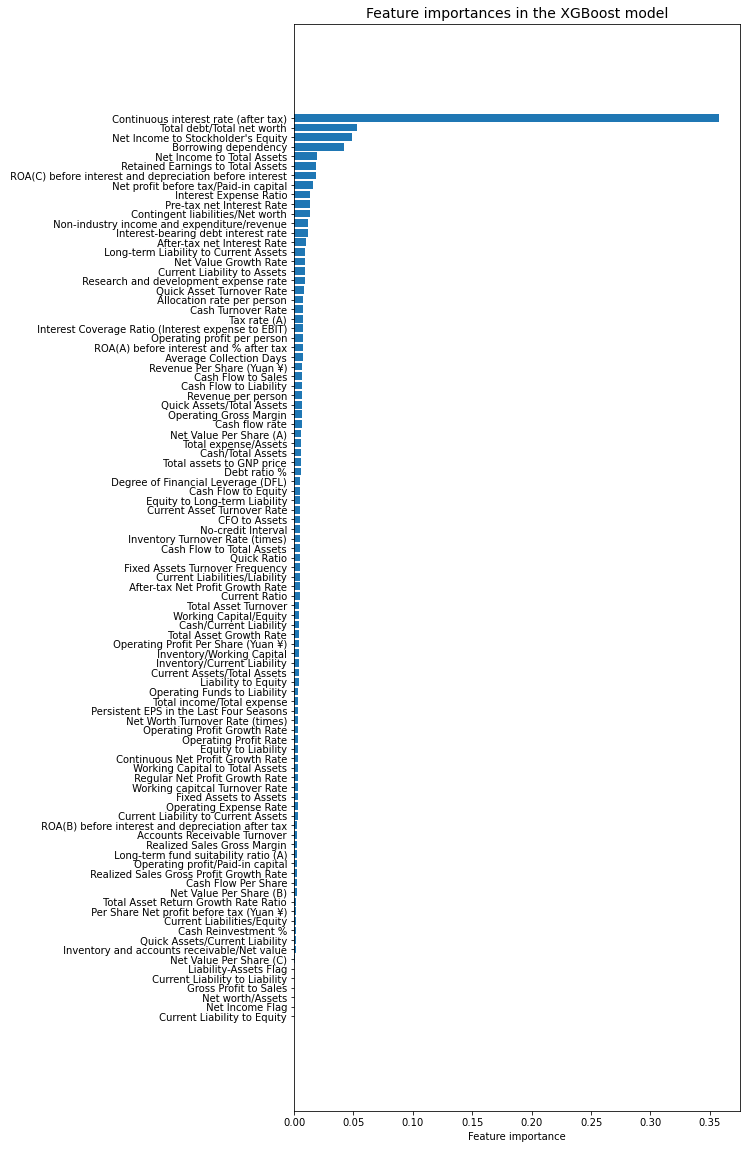

In [201]:
# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(my_XGBoost.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.1)

# ANN - Neural Network¶

# Before using breadth first search cv to find the best structure for an ANN with one hidden layer i will try myself to create different neurons with different number of neurons and test on the data set just to see what accuracy i get .¶


In [202]:
from sklearn.neural_network import MLPClassifier

#checking the datasets 
X_train[::]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
7675,0.407592,0.449244,0.445644,0.600528,0.600528,0.998836,0.797110,0.809049,0.303314,0.781289,...,0.742854,0.004387,0.623093,0.600527,0.832424,0.292679,0.025261,0.567417,1,0.016092
782,0.521669,0.572285,0.564163,0.608145,0.608145,0.998995,0.797566,0.809441,0.303779,0.781717,...,0.814862,0.001283,0.623384,0.608144,0.842202,0.284532,0.026964,0.565867,1,0.020059
1742,0.509628,0.540994,0.550725,0.599483,0.599483,0.998962,0.797425,0.809340,0.303601,0.781547,...,0.800274,0.001241,0.623177,0.599478,0.840318,0.277313,0.027240,0.566661,1,0.047013
3401,0.489251,0.541485,0.541303,0.607165,0.607208,0.999016,0.797426,0.809340,0.303490,0.781633,...,0.800896,0.004114,0.623814,0.607165,0.840440,0.279708,0.027003,0.565999,1,0.029489
12963,0.487710,0.526740,0.535919,0.600252,0.600252,0.999009,0.797342,0.809264,0.303357,0.781518,...,0.785169,0.003004,0.627830,0.600250,0.838184,0.290215,0.030529,0.561204,1,0.016710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.468581,0.535816,0.519193,0.640316,0.640316,0.999384,0.797923,0.809678,0.303590,0.781968,...,0.798928,0.001703,0.624423,0.640316,0.840223,0.276905,0.026806,0.565227,1,0.053767
11798,0.449811,0.524902,0.497618,0.603706,0.603706,0.998882,0.797163,0.809104,0.303311,0.781195,...,0.783639,0.015118,0.622589,0.603706,0.838416,0.286818,0.025656,0.581501,1,0.018228
6637,0.479842,0.546718,0.531292,0.595937,0.595937,0.998947,0.797514,0.809422,0.303787,0.781698,...,0.804093,0.012426,0.622299,0.595935,0.840633,0.278555,0.027041,0.566121,1,0.035220
2575,0.518842,0.559802,0.560362,0.634500,0.634500,0.999020,0.797445,0.809352,0.303513,0.781613,...,0.806752,0.001237,0.623632,0.634495,0.841411,0.286340,0.027300,0.566796,1,0.018534


# ANN with 30 neurons , one hidden layer

In [203]:
# training an ann
# 1 Hidden Layer with 30 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

In [204]:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 6.85779012
Iteration 2, loss = 1.21297979
Iteration 3, loss = 1.20116108
Iteration 4, loss = 1.17201264
Iteration 5, loss = 1.16350641
Iteration 6, loss = 1.16400145
Iteration 7, loss = 1.15934607
Iteration 8, loss = 1.15559825
Iteration 9, loss = 1.14693043
Iteration 10, loss = 1.13926384
Iteration 11, loss = 1.14281734
Iteration 12, loss = 1.13116147
Iteration 13, loss = 1.13501558
Iteration 14, loss = 1.11665328
Iteration 15, loss = 1.11678921
Iteration 16, loss = 1.11596782
Iteration 17, loss = 1.11603364
Iteration 18, loss = 1.11617410
Iteration 19, loss = 1.11562273
Iteration 20, loss = 1.11586123
Iteration 21, loss = 1.11590876
Iteration 22, loss = 1.11606299
Iteration 23, loss = 1.11575374
Iteration 24, loss = 1.11599409
Iteration 25, loss = 1.11600019
Iteration 26, loss = 1.11786330
Iteration 27, loss = 1.11656219
Iteration 28, loss = 1.11546776
Iteration 29, loss = 1.11660246
Iteration 30, loss = 1.11547057
Iteration 31, loss = 1.11553457
Iteration 32, los

MLPClassifier(alpha=1, hidden_layer_sizes=(30,), learning_rate_init=0.1,
              random_state=1, verbose=True)

In [205]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.5156565656565657


In [206]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 5.45643083
Iteration 2, loss = 1.47664393
Iteration 3, loss = 1.22521767
Iteration 4, loss = 1.09496963
Iteration 5, loss = 1.08927992
Iteration 6, loss = 1.08009667
Iteration 7, loss = 1.06805958
Iteration 8, loss = 1.06540914
Iteration 9, loss = 1.05908019
Iteration 10, loss = 1.05606212
Iteration 11, loss = 1.05642126
Iteration 12, loss = 1.05598020
Iteration 13, loss = 1.05609675
Iteration 14, loss = 1.05610029
Iteration 15, loss = 1.05627863
Iteration 16, loss = 1.05617658
Iteration 17, loss = 1.05654218
Iteration 18, loss = 1.05641362
Iteration 19, loss = 1.05576090
Iteration 20, loss = 1.05670264
Iteration 21, loss = 1.05652904
Iteration 22, loss = 1.05602654
Iteration 23, loss = 1.05577910
Iteration 24, loss = 1.05745008
Iteration 25, loss = 1.05680146
Iteration 26, loss = 1.05660316
Iteration 27, loss = 1.05589274
Iteration 28, loss = 1.05619731
Iteration 29, loss = 1.05583635
Iteration 30, loss = 1.05584789
Training loss did not improve more than tol=0.000

Iteration 53, loss = 1.06409042
Iteration 54, loss = 1.06437537
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 6.51415183
Iteration 2, loss = 1.34261192
Iteration 3, loss = 1.24277701
Iteration 4, loss = 1.19057285
Iteration 5, loss = 1.25922961
Iteration 6, loss = 1.24031436
Iteration 7, loss = 1.23829458
Iteration 8, loss = 1.18926625
Iteration 9, loss = 1.16328104
Iteration 10, loss = 1.16386745
Iteration 11, loss = 1.10668291
Iteration 12, loss = 1.09743556
Iteration 13, loss = 1.09743296
Iteration 14, loss = 1.07968238
Iteration 15, loss = 1.07383279
Iteration 16, loss = 1.08015647
Iteration 17, loss = 1.07122365
Iteration 18, loss = 1.08063608
Iteration 19, loss = 1.06754803
Iteration 20, loss = 1.07425597
Iteration 21, loss = 1.06805965
Iteration 22, loss = 1.06819911
Iteration 23, loss = 1.07082635
Iteration 24, loss = 1.06614834
Iteration 25, loss = 1.06580460
Iteration 26, loss = 1.06237020
Iteration 27, loss = 1.

In [207]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.5172745077767823


# As we can see the accuracy of our neural network is really bad. There was a 2 percent increase when using CV . Lets try different hyper parameters for our ann .

# ANN with 50 neurons , one hidden layer , learning rate init = .01

In [208]:
#training an ann
# 1 Hidden Layer with 50 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(50,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.08372518
Iteration 2, loss = 10.67934914
Iteration 3, loss = 10.39719516
Iteration 4, loss = 9.48945864
Iteration 5, loss = 9.80713943
Iteration 6, loss = 9.29845770
Iteration 7, loss = 8.98289730
Iteration 8, loss = 8.91158278
Iteration 9, loss = 8.95560669
Iteration 10, loss = 9.66477784
Iteration 11, loss = 9.12123147
Iteration 12, loss = 7.83171450
Iteration 13, loss = 8.27069637
Iteration 14, loss = 8.86378335
Iteration 15, loss = 8.10078448
Iteration 16, loss = 8.26991097
Iteration 17, loss = 8.39439545
Iteration 18, loss = 8.55789540
Iteration 19, loss = 8.59323073
Iteration 20, loss = 8.29569100
Iteration 21, loss = 7.75174208
Iteration 22, loss = 10.28026606
Iteration 23, loss = 8.11262503
Iteration 24, loss = 8.57965619
Iteration 25, loss = 8.64106474
Iteration 26, loss = 8.34661186
Iteration 27, loss = 8.29416917
Iteration 28, loss = 8.29281876
Iteration 29, loss = 8.11276181
Iteration 30, loss = 7.63680386
Iteration 31, loss = 7.69882631
Iteration 32,

MLPClassifier(alpha=1, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [209]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7378787878787879


# We see an increase in the accuracy from 50 to 70% , when we change the learning_rate_init to .01 and we increase the number of neurons to 50 .

In [210]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 13.40217964
Iteration 2, loss = 10.22803944
Iteration 3, loss = 9.57513956
Iteration 4, loss = 9.87953486
Iteration 5, loss = 8.86107869
Iteration 6, loss = 8.60480923
Iteration 7, loss = 9.19020223
Iteration 8, loss = 9.07835128
Iteration 9, loss = 8.00740413
Iteration 10, loss = 8.58530701
Iteration 11, loss = 9.23592186
Iteration 12, loss = 7.66101650
Iteration 13, loss = 8.12868899
Iteration 14, loss = 8.13930454
Iteration 15, loss = 8.31064841
Iteration 16, loss = 7.82702498
Iteration 17, loss = 7.21366847
Iteration 18, loss = 8.04478101
Iteration 19, loss = 7.55363332
Iteration 20, loss = 8.64962502
Iteration 21, loss = 8.03620587
Iteration 22, loss = 7.21301818
Iteration 23, loss = 7.63610940
Iteration 24, loss = 8.32231466
Iteration 25, loss = 7.13461889
Iteration 26, loss = 7.91747456
Iteration 27, loss = 7.32504005
Iteration 28, loss = 7.41627134
Iteration 29, loss = 8.42716611
Iteration 30, loss = 8.16660310
Iteration 31, loss = 7.58188452
Iteration 32, l

Iteration 33, loss = 8.74530035
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.66322018
Iteration 2, loss = 11.51388554
Iteration 3, loss = 10.01975764
Iteration 4, loss = 10.10809639
Iteration 5, loss = 9.66207945
Iteration 6, loss = 9.02178083
Iteration 7, loss = 9.84609218
Iteration 8, loss = 9.33923650
Iteration 9, loss = 9.03787003
Iteration 10, loss = 8.58841768
Iteration 11, loss = 8.93238407
Iteration 12, loss = 8.78885671
Iteration 13, loss = 9.74921058
Iteration 14, loss = 8.48330678
Iteration 15, loss = 8.19075924
Iteration 16, loss = 8.98100532
Iteration 17, loss = 7.91373160
Iteration 18, loss = 8.79348459
Iteration 19, loss = 8.21006133
Iteration 20, loss = 9.39912983
Iteration 21, loss = 9.45799711
Iteration 22, loss = 7.83783249
Iteration 23, loss = 8.54866301
Iteration 24, loss = 8.58115393
Iteration 25, loss = 8.80614857
Iteration 26, loss = 8.03769065
Iteration 27, loss = 8.38457858
Iteration 28, loss 

In [211]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.7401890780435132


# using 10 cross validation still gives us a score of 70 percent . 

# What happens if we keep increasing the number of neurons ?  # 

# ANN with 70 neurons , one hidden layer , learning rate init = .01 


In [212]:
#training an ann
# 1 Hidden Layer with 70 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.02513296
Iteration 2, loss = 11.38283519
Iteration 3, loss = 9.63772767
Iteration 4, loss = 9.02768105
Iteration 5, loss = 8.80128838
Iteration 6, loss = 8.08822519
Iteration 7, loss = 10.25475812
Iteration 8, loss = 8.30050709
Iteration 9, loss = 9.00607365
Iteration 10, loss = 8.00134818
Iteration 11, loss = 8.19922157
Iteration 12, loss = 7.00478821
Iteration 13, loss = 7.40833436
Iteration 14, loss = 7.43758687
Iteration 15, loss = 8.34041869
Iteration 16, loss = 6.90321139
Iteration 17, loss = 8.22728506
Iteration 18, loss = 7.32749942
Iteration 19, loss = 7.38721484
Iteration 20, loss = 7.44831393
Iteration 21, loss = 7.77205786
Iteration 22, loss = 7.70949516
Iteration 23, loss = 7.84905665
Iteration 24, loss = 7.56744116
Iteration 25, loss = 7.99676744
Iteration 26, loss = 8.26652116
Iteration 27, loss = 7.71457694
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1, hidden_layer_sizes=(70,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [213]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7497474747474747


# Accuracy keeps increasing ^ . 

# ANN with 200 neurons , one hidden layer , learning rate init = .01 

In [214]:
my_ANN = MLPClassifier(hidden_layer_sizes=(200,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.03608285
Iteration 2, loss = 10.84381829
Iteration 3, loss = 9.56774883
Iteration 4, loss = 9.58281690
Iteration 5, loss = 8.83231545
Iteration 6, loss = 8.66789620
Iteration 7, loss = 8.33460712
Iteration 8, loss = 7.68185374
Iteration 9, loss = 7.90096242
Iteration 10, loss = 7.43545084
Iteration 11, loss = 7.94322205
Iteration 12, loss = 7.60813639
Iteration 13, loss = 8.94447326
Iteration 14, loss = 7.55423488
Iteration 15, loss = 7.27353980
Iteration 16, loss = 7.87398206
Iteration 17, loss = 6.78137921
Iteration 18, loss = 7.76571277
Iteration 19, loss = 6.57538373
Iteration 20, loss = 6.56452598
Iteration 21, loss = 7.25937890
Iteration 22, loss = 8.04228570
Iteration 23, loss = 6.29958656
Iteration 24, loss = 7.37729341
Iteration 25, loss = 6.56684506
Iteration 26, loss = 6.25590713
Iteration 27, loss = 6.99493843
Iteration 28, loss = 6.47345171
Iteration 29, loss = 6.34635613
Iteration 30, loss = 6.21794994
Iteration 31, loss = 6.70520943
Iteration 32, l

MLPClassifier(alpha=1, hidden_layer_sizes=(200,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [215]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.8351010101010101


# at 200 neurons we see still an increase to 80% , but it seems to me there was a decrese between 100-200.

# ANN with 150 neurons , one hidden layer , learning rate init = .01  

In [216]:
my_ANN = MLPClassifier(hidden_layer_sizes=(150,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 14.00821056
Iteration 2, loss = 11.18013078
Iteration 3, loss = 10.15051190
Iteration 4, loss = 11.30231363
Iteration 5, loss = 9.27716417
Iteration 6, loss = 8.56273072
Iteration 7, loss = 8.22724260
Iteration 8, loss = 7.43872924
Iteration 9, loss = 8.94731876
Iteration 10, loss = 7.42336440
Iteration 11, loss = 7.39397665
Iteration 12, loss = 7.62310226
Iteration 13, loss = 7.36135026
Iteration 14, loss = 8.01449140
Iteration 15, loss = 7.14377981
Iteration 16, loss = 7.49686028
Iteration 17, loss = 8.48947431
Iteration 18, loss = 7.54475147
Iteration 19, loss = 7.70911585
Iteration 20, loss = 8.68041923
Iteration 21, loss = 6.93500224
Iteration 22, loss = 6.56063478
Iteration 23, loss = 6.66460428
Iteration 24, loss = 6.93767624
Iteration 25, loss = 7.31307828
Iteration 26, loss = 6.96856648
Iteration 27, loss = 7.41919632
Iteration 28, loss = 6.92618377
Iteration 29, loss = 6.67078106
Iteration 30, loss = 6.78191095
Iteration 31, loss = 6.17427215
Iteration 32,

# We see a decrease when the number of neurons is from 100-200 ^

# What happens if we use a different activation function ?  

In [217]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'tanh', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.82170197
Iteration 2, loss = 0.79148816
Iteration 3, loss = 0.77596299
Iteration 4, loss = 0.79240876
Iteration 5, loss = 0.69251610
Iteration 6, loss = 0.66125791
Iteration 7, loss = 0.64750494
Iteration 8, loss = 0.64930808
Iteration 9, loss = 0.69198845
Iteration 10, loss = 0.64790057
Iteration 11, loss = 0.67663902
Iteration 12, loss = 0.67444936
Iteration 13, loss = 0.66543903
Iteration 14, loss = 0.66032739
Iteration 15, loss = 0.64532258
Iteration 16, loss = 0.64587206
Iteration 17, loss = 0.70220575
Iteration 18, loss = 0.67592653
Iteration 19, loss = 0.66991354
Iteration 20, loss = 0.67949304
Iteration 21, loss = 0.66964994
Iteration 22, loss = 0.65933023
Iteration 23, loss = 0.65429276
Iteration 24, loss = 0.65487443
Iteration 25, loss = 0.65742535
Iteration 26, loss = 0.66413423
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

 accuracy:  0.6512626262626262


In [218]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.72148070
Iteration 2, loss = 0.71288322
Iteration 3, loss = 0.75458135
Iteration 4, loss = 0.86348828
Iteration 5, loss = 0.71517422
Iteration 6, loss = 0.71682681
Iteration 7, loss = 0.68380540
Iteration 8, loss = 0.64823648
Iteration 9, loss = 0.66283201
Iteration 10, loss = 0.65986906
Iteration 11, loss = 0.67923830
Iteration 12, loss = 0.67231512
Iteration 13, loss = 0.66517715
Iteration 14, loss = 0.65726417
Iteration 15, loss = 0.66693345
Iteration 16, loss = 0.68530256
Iteration 17, loss = 0.67732682
Iteration 18, loss = 0.67159015
Iteration 19, loss = 0.68010198
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

 accuracy:  0.6171717171717171


# We see a low accuracy to our sweet spot # of neurons of 200 . This may be since we need an activation function that is for classifiers like in this case . We can keep using relu or try a new one like sigmoid. ^ 

# Based on the different neurons i tested , the one with 80 neurons and 200 neurons in one hidden layer , and learning rate 0.01 are the one that gives me best accuracy of about 80- 83% . 

# Now lets try to use GridSearchCV to find the best number of neurons 

In [219]:
seed = 1  
np.random.seed(seed)

In [220]:

from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(80,250,10)] #From my testing ive seen that we get the best results from 5-200 and then starts dying above 200

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)



{'hidden_layer_sizes': [(80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,), (160,), (170,), (180,), (190,), (200,), (210,), (220,), (230,), (240,)]} 

Iteration 1, loss = 13.53071336
Iteration 2, loss = 9.60065654
Iteration 3, loss = 9.31860698
Iteration 4, loss = 9.06560227
Iteration 5, loss = 7.94158253
Iteration 6, loss = 7.24329491
Iteration 7, loss = 7.93704435
Iteration 8, loss = 7.64813410
Iteration 9, loss = 7.91928261
Iteration 10, loss = 6.89820882
Iteration 11, loss = 7.15589982
Iteration 12, loss = 7.07708916
Iteration 13, loss = 7.75844458
Iteration 14, loss = 6.76920753
Iteration 15, loss = 6.56199287
Iteration 16, loss = 6.34263793
Iteration 17, loss = 6.48058445
Iteration 18, loss = 6.51680354
Iteration 19, loss = 6.57947597
Iteration 20, loss = 5.99268071
Iteration 21, loss = 8.06440390
Iteration 22, loss = 7.23971113
Iteration 23, loss = 6.68601367
Iteration 24, loss = 6.08740836
Iteration 25, loss = 5.93956562
Iteration 26, loss = 6.47372511
Iteration 27, l

Iteration 24, loss = 7.16304098
Iteration 25, loss = 6.86868527
Iteration 26, loss = 6.68537490
Iteration 27, loss = 6.13448899
Iteration 28, loss = 7.36625933
Iteration 29, loss = 6.11365687
Iteration 30, loss = 6.61076549
Iteration 31, loss = 7.15142969
Iteration 32, loss = 5.90682523
Iteration 33, loss = 6.54741320
Iteration 34, loss = 7.13626041
Iteration 35, loss = 6.91579597
Iteration 36, loss = 7.30820071
Iteration 37, loss = 6.83003517
Iteration 38, loss = 6.41740464
Iteration 39, loss = 7.00953376
Iteration 40, loss = 7.03156216
Iteration 41, loss = 6.93489850
Iteration 42, loss = 7.13222497
Iteration 43, loss = 7.93722807
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.28727668
Iteration 2, loss = 10.74573376
Iteration 3, loss = 10.20851946
Iteration 4, loss = 9.22816968
Iteration 5, loss = 9.11277462
Iteration 6, loss = 8.11349282
Iteration 7, loss = 7.43323799
Iteration 8, loss = 6.90990572
Iteration 9, loss =

Iteration 3, loss = 9.30186490
Iteration 4, loss = 9.16560299
Iteration 5, loss = 9.17528274
Iteration 6, loss = 8.63250688
Iteration 7, loss = 8.03825530
Iteration 8, loss = 8.72621894
Iteration 9, loss = 7.99780170
Iteration 10, loss = 7.85296517
Iteration 11, loss = 7.92905264
Iteration 12, loss = 7.84285517
Iteration 13, loss = 7.55939196
Iteration 14, loss = 7.69166351
Iteration 15, loss = 9.35680639
Iteration 16, loss = 8.15485063
Iteration 17, loss = 7.25172057
Iteration 18, loss = 7.86373109
Iteration 19, loss = 8.64594794
Iteration 20, loss = 7.94526221
Iteration 21, loss = 7.72877376
Iteration 22, loss = 7.91338012
Iteration 23, loss = 7.49981920
Iteration 24, loss = 7.23382652
Iteration 25, loss = 8.26267549
Iteration 26, loss = 7.16420509
Iteration 27, loss = 7.45505223
Iteration 28, loss = 7.93752527
Iteration 29, loss = 7.00594187
Iteration 30, loss = 7.38801060
Iteration 31, loss = 7.45197704
Iteration 32, loss = 7.46426208
Iteration 33, loss = 7.28586420
Iteration 34, l

Iteration 18, loss = 7.16427142
Iteration 19, loss = 6.89604137
Iteration 20, loss = 7.62025512
Iteration 21, loss = 6.78560065
Iteration 22, loss = 7.88060957
Iteration 23, loss = 7.37381606
Iteration 24, loss = 7.00923176
Iteration 25, loss = 7.34879317
Iteration 26, loss = 6.41245033
Iteration 27, loss = 7.10308445
Iteration 28, loss = 7.06905900
Iteration 29, loss = 7.99047679
Iteration 30, loss = 6.82970890
Iteration 31, loss = 6.95371334
Iteration 32, loss = 7.41767991
Iteration 33, loss = 6.94780966
Iteration 34, loss = 7.05788471
Iteration 35, loss = 7.47724803
Iteration 36, loss = 6.70072263
Iteration 37, loss = 7.04714144
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.76552511
Iteration 2, loss = 10.43719913
Iteration 3, loss = 11.06613291
Iteration 4, loss = 8.49677194
Iteration 5, loss = 9.07075959
Iteration 6, loss = 8.25959069
Iteration 7, loss = 8.44647927
Iteration 8, loss = 8.03490855
Iteration 9, loss =

Iteration 29, loss = 7.68316060
Iteration 30, loss = 7.42653878
Iteration 31, loss = 7.02051370
Iteration 32, loss = 7.13346960
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.44790032
Iteration 2, loss = 11.11620564
Iteration 3, loss = 10.13443456
Iteration 4, loss = 9.38491008
Iteration 5, loss = 9.59775333
Iteration 6, loss = 8.43124271
Iteration 7, loss = 8.83019358
Iteration 8, loss = 9.34727917
Iteration 9, loss = 8.43323547
Iteration 10, loss = 8.25704787
Iteration 11, loss = 8.16339508
Iteration 12, loss = 8.50156399
Iteration 13, loss = 7.42111288
Iteration 14, loss = 7.38638086
Iteration 15, loss = 7.04189155
Iteration 16, loss = 7.88363193
Iteration 17, loss = 7.22867274
Iteration 18, loss = 7.52531965
Iteration 19, loss = 7.62791452
Iteration 20, loss = 7.21639856
Iteration 21, loss = 7.09330611
Iteration 22, loss = 9.04758243
Iteration 23, loss = 7.41177926
Iteration 24, loss = 7.79749918
Iteration 25, loss =

Iteration 24, loss = 7.29455855
Iteration 25, loss = 7.54519295
Iteration 26, loss = 7.30509524
Iteration 27, loss = 7.42501837
Iteration 28, loss = 7.41818424
Iteration 29, loss = 7.04293100
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.15284634
Iteration 2, loss = 10.78611381
Iteration 3, loss = 8.87062833
Iteration 4, loss = 9.22421413
Iteration 5, loss = 9.03577824
Iteration 6, loss = 8.39967140
Iteration 7, loss = 8.44969409
Iteration 8, loss = 8.40037202
Iteration 9, loss = 7.79209932
Iteration 10, loss = 8.06539595
Iteration 11, loss = 7.70076636
Iteration 12, loss = 7.21495192
Iteration 13, loss = 8.19585609
Iteration 14, loss = 7.48027959
Iteration 15, loss = 6.94018011
Iteration 16, loss = 6.58596942
Iteration 17, loss = 7.26857427
Iteration 18, loss = 6.67369798
Iteration 19, loss = 7.66415023
Iteration 20, loss = 7.00469728
Iteration 21, loss = 6.89707224
Iteration 22, loss = 6.99002367
Iteration 23, loss = 

Iteration 5, loss = 9.58733070
Iteration 6, loss = 8.15513205
Iteration 7, loss = 7.64152917
Iteration 8, loss = 6.95636675
Iteration 9, loss = 7.69601910
Iteration 10, loss = 9.29218586
Iteration 11, loss = 7.73133456
Iteration 12, loss = 7.95854246
Iteration 13, loss = 6.92917255
Iteration 14, loss = 6.58464328
Iteration 15, loss = 6.57395579
Iteration 16, loss = 7.25435029
Iteration 17, loss = 6.80955033
Iteration 18, loss = 6.81056001
Iteration 19, loss = 6.96333778
Iteration 20, loss = 7.11143315
Iteration 21, loss = 6.89155107
Iteration 22, loss = 6.79294429
Iteration 23, loss = 6.92036264
Iteration 24, loss = 6.83737840
Iteration 25, loss = 7.61145491
Iteration 26, loss = 6.79604987
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.58112783
Iteration 2, loss = 11.20673234
Iteration 3, loss = 9.45297227
Iteration 4, loss = 8.56427126
Iteration 5, loss = 8.54599650
Iteration 6, loss = 8.44483768
Iteration 7, loss = 8.3

Iteration 24, loss = 6.19505649
Iteration 25, loss = 6.68508550
Iteration 26, loss = 6.08036223
Iteration 27, loss = 6.38803424
Iteration 28, loss = 6.32578771
Iteration 29, loss = 6.61280079
Iteration 30, loss = 6.06882651
Iteration 31, loss = 6.51717340
Iteration 32, loss = 6.48160092
Iteration 33, loss = 6.33231984
Iteration 34, loss = 6.79016619
Iteration 35, loss = 7.07899599
Iteration 36, loss = 6.63412761
Iteration 37, loss = 6.86578247
Iteration 38, loss = 7.48931889
Iteration 39, loss = 6.61004283
Iteration 40, loss = 6.81693791
Iteration 41, loss = 7.03951315
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.77496963
Iteration 2, loss = 10.32942419
Iteration 3, loss = 9.24507796
Iteration 4, loss = 9.10169945
Iteration 5, loss = 7.91909710
Iteration 6, loss = 8.47510213
Iteration 7, loss = 7.71882405
Iteration 8, loss = 7.12654643
Iteration 9, loss = 7.43730221
Iteration 10, loss = 6.93005619
Iteration 11, loss = 

Iteration 1, loss = 13.64345820
Iteration 2, loss = 10.11329031
Iteration 3, loss = 9.07083618
Iteration 4, loss = 8.82650780
Iteration 5, loss = 8.67978656
Iteration 6, loss = 8.66964461
Iteration 7, loss = 8.41800245
Iteration 8, loss = 8.41327252
Iteration 9, loss = 7.23778959
Iteration 10, loss = 7.32078188
Iteration 11, loss = 7.20187496
Iteration 12, loss = 6.97662448
Iteration 13, loss = 7.51723827
Iteration 14, loss = 7.46367879
Iteration 15, loss = 7.04786202
Iteration 16, loss = 6.61501725
Iteration 17, loss = 7.83906965
Iteration 18, loss = 7.06810550
Iteration 19, loss = 6.93860206
Iteration 20, loss = 7.31583497
Iteration 21, loss = 7.76941361
Iteration 22, loss = 6.87290514
Iteration 23, loss = 6.51487116
Iteration 24, loss = 7.64452596
Iteration 25, loss = 6.62302632
Iteration 26, loss = 7.42585716
Iteration 27, loss = 6.52282051
Iteration 28, loss = 7.07082263
Iteration 29, loss = 6.88983156
Iteration 30, loss = 7.19209504
Iteration 31, loss = 6.83832249
Iteration 32, l

Iteration 1, loss = 13.45620980
Iteration 2, loss = 10.52486698
Iteration 3, loss = 9.79565948
Iteration 4, loss = 9.89940152
Iteration 5, loss = 8.90916202
Iteration 6, loss = 9.24503650
Iteration 7, loss = 8.58457394
Iteration 8, loss = 8.09260130
Iteration 9, loss = 7.85417595
Iteration 10, loss = 7.36791729
Iteration 11, loss = 7.15613118
Iteration 12, loss = 7.18424172
Iteration 13, loss = 8.01020684
Iteration 14, loss = 7.95614496
Iteration 15, loss = 7.31181186
Iteration 16, loss = 6.76879140
Iteration 17, loss = 7.04044652
Iteration 18, loss = 7.68618031
Iteration 19, loss = 6.45513572
Iteration 20, loss = 7.47050718
Iteration 21, loss = 6.82302914
Iteration 22, loss = 6.54287481
Iteration 23, loss = 7.53712008
Iteration 24, loss = 6.57915309
Iteration 25, loss = 6.95129094
Iteration 26, loss = 7.03607263
Iteration 27, loss = 7.14063634
Iteration 28, loss = 7.01376164
Iteration 29, loss = 6.88949821
Iteration 30, loss = 7.68768577
Training loss did not improve more than tol=0.0

Iteration 23, loss = 7.12888779
Iteration 24, loss = 7.03549363
Iteration 25, loss = 7.13117513
Iteration 26, loss = 7.40210432
Iteration 27, loss = 6.34199012
Iteration 28, loss = 6.45166756
Iteration 29, loss = 6.85958044
Iteration 30, loss = 6.79438780
Iteration 31, loss = 6.57968008
Iteration 32, loss = 7.02079143
Iteration 33, loss = 6.95572619
Iteration 34, loss = 6.79943034
Iteration 35, loss = 7.14765208
Iteration 36, loss = 6.72542070
Iteration 37, loss = 6.99050112
Iteration 38, loss = 7.44231204
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.58456842
Iteration 2, loss = 10.14650773
Iteration 3, loss = 9.75347320
Iteration 4, loss = 9.30557019
Iteration 5, loss = 9.01058856
Iteration 6, loss = 9.33011680
Iteration 7, loss = 8.14674972
Iteration 8, loss = 7.52665131
Iteration 9, loss = 8.22799837
Iteration 10, loss = 7.98387830
Iteration 11, loss = 7.61460532
Iteration 12, loss = 7.66966701
Iteration 13, loss = 

Iteration 24, loss = 6.76544011
Iteration 25, loss = 6.78339852
Iteration 26, loss = 7.58237621
Iteration 27, loss = 7.19396189
Iteration 28, loss = 7.45664770
Iteration 29, loss = 6.83340512
Iteration 30, loss = 7.44082393
Iteration 31, loss = 6.90889539
Iteration 32, loss = 7.47417629
Iteration 33, loss = 7.14693850
Iteration 34, loss = 7.16318839
Iteration 35, loss = 8.00510839
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.86013007
Iteration 2, loss = 11.06137436
Iteration 3, loss = 10.30608130
Iteration 4, loss = 8.64711561
Iteration 5, loss = 9.62580038
Iteration 6, loss = 8.47354256
Iteration 7, loss = 7.83897528
Iteration 8, loss = 7.97664679
Iteration 9, loss = 8.63029781
Iteration 10, loss = 7.39006536
Iteration 11, loss = 7.67816517
Iteration 12, loss = 7.22757284
Iteration 13, loss = 7.94996321
Iteration 14, loss = 7.50821889
Iteration 15, loss = 7.48134324
Iteration 16, loss = 6.86356829
Iteration 17, loss =

Iteration 26, loss = 7.05167252
Iteration 27, loss = 6.70854540
Iteration 28, loss = 6.81640471
Iteration 29, loss = 6.82411039
Iteration 30, loss = 6.69832410
Iteration 31, loss = 6.39963234
Iteration 32, loss = 7.02800087
Iteration 33, loss = 6.66062543
Iteration 34, loss = 7.37390199
Iteration 35, loss = 6.86620208
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.44624342
Iteration 2, loss = 11.21910041
Iteration 3, loss = 9.97726845
Iteration 4, loss = 9.52510750
Iteration 5, loss = 8.24464063
Iteration 6, loss = 8.54430302
Iteration 7, loss = 8.49545909
Iteration 8, loss = 7.75307822
Iteration 9, loss = 8.48630612
Iteration 10, loss = 8.11341835
Iteration 11, loss = 7.57904018
Iteration 12, loss = 7.58402022
Iteration 13, loss = 7.25682966
Iteration 14, loss = 7.57246420
Iteration 15, loss = 7.73642306
Iteration 16, loss = 7.71255629
Iteration 17, loss = 6.92844993
Iteration 18, loss = 7.12838041
Iteration 19, loss = 

Iteration 6, loss = 8.96005333
Iteration 7, loss = 8.20520010
Iteration 8, loss = 8.32064868
Iteration 9, loss = 7.86487496
Iteration 10, loss = 7.24784335
Iteration 11, loss = 7.09076694
Iteration 12, loss = 8.29097134
Iteration 13, loss = 8.07351179
Iteration 14, loss = 6.88153337
Iteration 15, loss = 7.65648662
Iteration 16, loss = 6.66199051
Iteration 17, loss = 7.47128056
Iteration 18, loss = 8.10237606
Iteration 19, loss = 6.82353389
Iteration 20, loss = 6.51647718
Iteration 21, loss = 6.92301717
Iteration 22, loss = 6.81404914
Iteration 23, loss = 6.64485957
Iteration 24, loss = 7.24839879
Iteration 25, loss = 6.71605064
Iteration 26, loss = 7.05086511
Iteration 27, loss = 6.73752948
Iteration 28, loss = 6.89063135
Iteration 29, loss = 6.36952019
Iteration 30, loss = 6.82635551
Iteration 31, loss = 7.28294758
Iteration 32, loss = 6.63537579
Iteration 33, loss = 7.36838988
Iteration 34, loss = 7.07064013
Iteration 35, loss = 6.96288164
Iteration 36, loss = 6.95415395
Iteration 37

Iteration 11, loss = 7.87174971
Iteration 12, loss = 7.71850077
Iteration 13, loss = 7.06548288
Iteration 14, loss = 7.66833871
Iteration 15, loss = 7.31015797
Iteration 16, loss = 8.61526129
Iteration 17, loss = 7.70773404
Iteration 18, loss = 6.72754077
Iteration 19, loss = 6.99529501
Iteration 20, loss = 7.65629409
Iteration 21, loss = 7.32361084
Iteration 22, loss = 7.25438323
Iteration 23, loss = 6.97469707
Iteration 24, loss = 6.89391660
Iteration 25, loss = 6.49419544
Iteration 26, loss = 7.27905517
Iteration 27, loss = 6.62873743
Iteration 28, loss = 7.05396403
Iteration 29, loss = 7.07591816
Iteration 30, loss = 6.89632402
Iteration 31, loss = 7.14727773
Iteration 32, loss = 7.45194388
Iteration 33, loss = 7.40127391
Iteration 34, loss = 7.12419799
Iteration 35, loss = 7.31661765
Iteration 36, loss = 7.31496037
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 12.83873379
Iteration 2, loss = 9.72921208
Iteration 3, lo

Iteration 28, loss = 7.00134594
Iteration 29, loss = 7.32906926
Iteration 30, loss = 6.82231413
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.58140544
Iteration 2, loss = 10.25035744
Iteration 3, loss = 8.96678229
Iteration 4, loss = 8.86501513
Iteration 5, loss = 8.30480216
Iteration 6, loss = 7.98695302
Iteration 7, loss = 7.93516793
Iteration 8, loss = 8.70564044
Iteration 9, loss = 7.35253797
Iteration 10, loss = 7.88336122
Iteration 11, loss = 7.24483518
Iteration 12, loss = 7.81915609
Iteration 13, loss = 7.97280081
Iteration 14, loss = 7.54925310
Iteration 15, loss = 6.87166586
Iteration 16, loss = 6.95554633
Iteration 17, loss = 7.03822265
Iteration 18, loss = 7.30773061
Iteration 19, loss = 6.27824816
Iteration 20, loss = 7.15977579
Iteration 21, loss = 6.50316262
Iteration 22, loss = 7.38450048
Iteration 23, loss = 6.39692887
Iteration 24, loss = 7.21712097
Iteration 25, loss = 6.94690747
Iteration 26, loss = 

Iteration 33, loss = 6.66030201
Iteration 34, loss = 6.72104593
Iteration 35, loss = 6.41760059
Iteration 36, loss = 6.82342278
Iteration 37, loss = 6.46228585
Iteration 38, loss = 6.98503760
Iteration 39, loss = 6.31070126
Iteration 40, loss = 6.97499564
Iteration 41, loss = 6.72115054
Iteration 42, loss = 6.87785639
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.02812980
Iteration 2, loss = 9.98621662
Iteration 3, loss = 9.79366082
Iteration 4, loss = 9.59274339
Iteration 5, loss = 8.27254137
Iteration 6, loss = 9.53104942
Iteration 7, loss = 7.80292030
Iteration 8, loss = 8.43116665
Iteration 9, loss = 7.00188558
Iteration 10, loss = 7.90407742
Iteration 11, loss = 7.06423431
Iteration 12, loss = 6.41026480
Iteration 13, loss = 7.29097220
Iteration 14, loss = 7.65673058
Iteration 15, loss = 6.71079328
Iteration 16, loss = 7.84043117
Iteration 17, loss = 6.98286308
Iteration 18, loss = 6.37658669
Iteration 19, loss = 6

Iteration 7, loss = 8.22689381
Iteration 8, loss = 8.08999864
Iteration 9, loss = 7.91234566
Iteration 10, loss = 7.15886727
Iteration 11, loss = 6.75213062
Iteration 12, loss = 6.45943455
Iteration 13, loss = 6.73109825
Iteration 14, loss = 6.82377364
Iteration 15, loss = 6.44071468
Iteration 16, loss = 6.88472993
Iteration 17, loss = 6.17909062
Iteration 18, loss = 6.87841231
Iteration 19, loss = 6.49540763
Iteration 20, loss = 6.45770171
Iteration 21, loss = 7.09167699
Iteration 22, loss = 6.46043485
Iteration 23, loss = 7.16659031
Iteration 24, loss = 6.35812297
Iteration 25, loss = 6.46886449
Iteration 26, loss = 6.19156073
Iteration 27, loss = 6.84523268
Iteration 28, loss = 6.13316366
Iteration 29, loss = 6.13130408
Iteration 30, loss = 6.09925305
Iteration 31, loss = 6.17000951
Iteration 32, loss = 6.63500619
Iteration 33, loss = 6.32036067
Iteration 34, loss = 6.33405382
Iteration 35, loss = 6.62291671
Iteration 36, loss = 6.32740052
Iteration 37, loss = 7.05924236
Iteration 3

Iteration 2, loss = 10.51216560
Iteration 3, loss = 10.32950356
Iteration 4, loss = 8.42095908
Iteration 5, loss = 8.97638856
Iteration 6, loss = 7.19363121
Iteration 7, loss = 7.81872749
Iteration 8, loss = 7.45332170
Iteration 9, loss = 7.87674886
Iteration 10, loss = 6.82188026
Iteration 11, loss = 7.14331495
Iteration 12, loss = 7.35007780
Iteration 13, loss = 8.54873647
Iteration 14, loss = 7.74904295
Iteration 15, loss = 6.96820568
Iteration 16, loss = 7.54334807
Iteration 17, loss = 6.90113092
Iteration 18, loss = 6.30150481
Iteration 19, loss = 6.88785937
Iteration 20, loss = 7.47482861
Iteration 21, loss = 6.83430605
Iteration 22, loss = 7.12158080
Iteration 23, loss = 6.90167546
Iteration 24, loss = 6.49149004
Iteration 25, loss = 7.23733526
Iteration 26, loss = 6.57137324
Iteration 27, loss = 6.68235876
Iteration 28, loss = 7.21457261
Iteration 29, loss = 6.64567517
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 

Iteration 26, loss = 7.00938943
Iteration 27, loss = 7.24736262
Iteration 28, loss = 7.14679386
Iteration 29, loss = 7.04790197
Iteration 30, loss = 6.98745013
Iteration 31, loss = 7.62299038
Iteration 32, loss = 7.17641158
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.26581297
Iteration 2, loss = 9.95777677
Iteration 3, loss = 9.29312491
Iteration 4, loss = 8.29187179
Iteration 5, loss = 7.99987093
Iteration 6, loss = 7.58942638
Iteration 7, loss = 8.09084049
Iteration 8, loss = 8.55857987
Iteration 9, loss = 7.28200570
Iteration 10, loss = 7.23105189
Iteration 11, loss = 8.28531438
Iteration 12, loss = 7.29190563
Iteration 13, loss = 8.35832998
Iteration 14, loss = 7.34753727
Iteration 15, loss = 7.09954012
Iteration 16, loss = 7.04911268
Iteration 17, loss = 6.22058158
Iteration 18, loss = 5.91126007
Iteration 19, loss = 6.58100692
Iteration 20, loss = 6.76765139
Iteration 21, loss = 7.07622439
Iteration 22, loss = 6

Iteration 1, loss = 13.57729327
Iteration 2, loss = 9.49500656
Iteration 3, loss = 8.97199852
Iteration 4, loss = 8.10647291
Iteration 5, loss = 8.80966480
Iteration 6, loss = 7.57619158
Iteration 7, loss = 6.58973400
Iteration 8, loss = 7.74721995
Iteration 9, loss = 7.20225156
Iteration 10, loss = 6.97272321
Iteration 11, loss = 7.63263457
Iteration 12, loss = 6.70480579
Iteration 13, loss = 7.07644940
Iteration 14, loss = 7.15743646
Iteration 15, loss = 6.40736700
Iteration 16, loss = 6.69959320
Iteration 17, loss = 6.34486331
Iteration 18, loss = 6.46726831
Iteration 19, loss = 6.14062725
Iteration 20, loss = 6.50374233
Iteration 21, loss = 6.44452480
Iteration 22, loss = 6.07254045
Iteration 23, loss = 6.14138980
Iteration 24, loss = 7.01545379
Iteration 25, loss = 6.39511157
Iteration 26, loss = 6.14186519
Iteration 27, loss = 6.33209904
Iteration 28, loss = 6.54653907
Iteration 29, loss = 6.37290759
Iteration 30, loss = 7.07990200
Iteration 31, loss = 6.88584135
Iteration 32, lo

Iteration 11, loss = 7.85856202
Iteration 12, loss = 7.71848739
Iteration 13, loss = 7.20049956
Iteration 14, loss = 7.86944463
Iteration 15, loss = 6.67234239
Iteration 16, loss = 6.58995165
Iteration 17, loss = 7.03010068
Iteration 18, loss = 6.78651306
Iteration 19, loss = 6.76756667
Iteration 20, loss = 6.84289948
Iteration 21, loss = 6.70523981
Iteration 22, loss = 6.85559772
Iteration 23, loss = 6.70520115
Iteration 24, loss = 7.30381666
Iteration 25, loss = 6.81465816
Iteration 26, loss = 7.12944701
Iteration 27, loss = 7.13111924
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.42185217
Iteration 2, loss = 10.45251129
Iteration 3, loss = 9.87152504
Iteration 4, loss = 10.74447759
Iteration 5, loss = 7.84219720
Iteration 6, loss = 7.82576298
Iteration 7, loss = 7.19709286
Iteration 8, loss = 7.78326579
Iteration 9, loss = 7.76408349
Iteration 10, loss = 6.86633209
Iteration 11, loss = 7.02494527
Iteration 12, loss =

Iteration 20, loss = 6.81928399
Iteration 21, loss = 7.16025966
Iteration 22, loss = 7.26795477
Iteration 23, loss = 7.18214449
Iteration 24, loss = 7.56017039
Iteration 25, loss = 7.43031081
Iteration 26, loss = 7.51018989
Iteration 27, loss = 7.43738585
Iteration 28, loss = 7.10046761
Iteration 29, loss = 7.82634688
Iteration 30, loss = 6.74569515
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.12657466
Iteration 2, loss = 9.48910269
Iteration 3, loss = 9.24985399
Iteration 4, loss = 8.91598036
Iteration 5, loss = 8.06698587
Iteration 6, loss = 8.38130077
Iteration 7, loss = 7.46388777
Iteration 8, loss = 7.32045861
Iteration 9, loss = 7.24925110
Iteration 10, loss = 7.37435880
Iteration 11, loss = 7.26864615
Iteration 12, loss = 6.49870756
Iteration 13, loss = 6.65834955
Iteration 14, loss = 7.33245651
Iteration 15, loss = 7.62576489
Iteration 16, loss = 7.59649055
Iteration 17, loss = 6.23097275
Iteration 18, loss = 7

Iteration 40, loss = 7.45806846
Iteration 41, loss = 6.98832948
Iteration 42, loss = 6.79513294
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.39308926
Iteration 2, loss = 9.74819483
Iteration 3, loss = 9.64012658
Iteration 4, loss = 9.15257129
Iteration 5, loss = 7.97682945
Iteration 6, loss = 8.19227279
Iteration 7, loss = 7.41446898
Iteration 8, loss = 7.17812880
Iteration 9, loss = 6.18240179
Iteration 10, loss = 6.59892021
Iteration 11, loss = 7.10325057
Iteration 12, loss = 7.00912151
Iteration 13, loss = 6.94111300
Iteration 14, loss = 6.26377462
Iteration 15, loss = 6.21726692
Iteration 16, loss = 6.71646035
Iteration 17, loss = 6.78086637
Iteration 18, loss = 6.71032766
Iteration 19, loss = 6.33588172
Iteration 20, loss = 6.41744579
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.17570098
Iteration 2, loss = 9.77949082
Iteration 3, loss = 9.1214857

Iteration 8, loss = 7.98116318
Iteration 9, loss = 7.75587941
Iteration 10, loss = 7.64100805
Iteration 11, loss = 7.54953638
Iteration 12, loss = 7.93146975
Iteration 13, loss = 7.34270428
Iteration 14, loss = 7.65293966
Iteration 15, loss = 6.83742736
Iteration 16, loss = 7.45979673
Iteration 17, loss = 7.45166987
Iteration 18, loss = 7.00235821
Iteration 19, loss = 7.19995365
Iteration 20, loss = 7.32449324
Iteration 21, loss = 8.06785437
Iteration 22, loss = 7.47949448
Iteration 23, loss = 6.89669631
Iteration 24, loss = 6.61028045
Iteration 25, loss = 6.84861729
Iteration 26, loss = 6.99701355
Iteration 27, loss = 7.42821410
Iteration 28, loss = 6.89993279
Iteration 29, loss = 7.14000750
Iteration 30, loss = 7.35516659
Iteration 31, loss = 7.03238708
Iteration 32, loss = 7.36601474
Iteration 33, loss = 7.40192396
Iteration 34, loss = 7.79089599
Iteration 35, loss = 7.11954281
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1, learning_rate_init=0.01,
                                     random_state=1, verbose=True),
             param_grid={'hidden_layer_sizes': [(80,), (90,), (100,), (110,),
                                                (120,), (130,), (140,), (150,),
                                                (160,), (170,), (180,), (190,),
                                                (200,), (210,), (220,), (230,),
                                                (240,)]},
             scoring='accuracy')

In [221]:
# Best number of neurons for our neuron and also accuracy 
print(grid.best_score_)
print(grid.best_params_)

0.8145183449353274
{'hidden_layer_sizes': (110,)}


# Results : 120 number of neurons with best accuracy of 81 percent

In [222]:
my_ANN = MLPClassifier(hidden_layer_sizes=(120,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=False, tol=0.0001)

my_ANN.fit(X_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=(120,), learning_rate_init=0.01,
              random_state=1)

In [223]:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

In [224]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.7736055207112826


In [225]:
# Weights:
print(my_ANN.coefs_)

print('\n')

# Bias weights:
print(my_ANN.intercepts_)


[array([[-1.02301835e-03,  6.41607064e-03, -6.01355706e-03, ...,
        -1.24437793e-03, -4.78853610e-03, -1.60731072e-02],
       [-5.68467321e-04,  9.10581783e-03, -7.16857856e-03, ...,
        -5.73140851e-04, -6.62766998e-03, -1.31710924e-02],
       [-1.11263618e-03,  8.37128141e-03, -6.03044103e-03, ...,
        -1.43270188e-03, -5.83614520e-03, -2.11068582e-02],
       ...,
       [-1.31806950e-03,  7.27077880e-03, -1.77057851e-03, ...,
        -3.37668059e-03, -5.28769886e-03, -9.42223534e-02],
       [-1.79648595e-03,  2.45665258e-02,  1.37181762e-04, ...,
        -5.49261069e-03, -8.04854613e-03, -2.07341353e-01],
       [-3.18670432e-05, -1.24614088e-03,  2.75427429e-05, ...,
        -5.38224510e-04, -4.28133143e-04,  6.08969122e-03]]), array([[-4.53226461e-03],
       [-1.51375950e-01],
       [ 2.60009128e-02],
       [ 3.36377078e-03],
       [-2.98693906e-02],
       [ 5.40367768e-03],
       [-3.17927333e-02],
       [ 9.49385884e-03],
       [ 1.26820243e-02],
       

In [226]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[1 1 1 ... 0 0 1] 

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [227]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.10155078 0.11005503 1.        ]




[0.        0.7200408 0.7200408 1.       ]


# AUC, ROC Curve , and Confusion Matrix for our 120 neurons , 1 hiddlen layer ANN


In [228]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.808054588232413


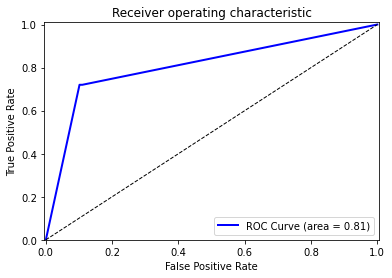

In [229]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [230]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[1116  883]
 [ 633 1328]]


# Decision Tree


In [232]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=2)


dec_tree.fit(X_train, y_train)


dec_tree_predict = dec_tree.predict(X_test)


dec_tree_score = accuracy_score(y_test, dec_tree_predict)

print('Decision Tree accuracy: ' + str(dec_tree_score))

Decision Tree accuracy: 0.9497474747474748


In [233]:
from sklearn import metrics

y_predict_proba = dec_tree.predict_proba(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC_DecisionTree = metrics.auc(fpr1, tpr1)
print('Area Under the Curve: ' + str(AUC_DecisionTree))

Area Under the Curve: 0.9498712895458439


In [234]:
from sklearn.utils import resample
import statistics

predictions = []

for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 5114 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict = Base_DecisionTree.predict(X_test)

    predictions.append(y_predict)
    


In [235]:
# Here we are printing our predictions matrix. 
# 28 rows consisting of 1705 predictions.
# The columns in the matrix are the votes on a feature from each iteration. 
# We take the majority vote on each column and create a final array of votes.

for x in range(len(predictions)):
    for y in range(len(predictions[x])):
        print(predictions[x][y], end=' ')
    print(str(x) + '#\n')

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 

0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 

0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

In [236]:
# a is our Transposed Predictions Matrix

a = np.array(predictions)
print(a.T)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 0 1 1]
 [1 0 1 ... 1 1 1]]


In [237]:
# After transposing we have 1705 rows of predictions to be voted on. 

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        print(a.T[x][y], end=' ')
    print('  ' + str(x) + '\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   0

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   4

0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0   5

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   6

1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1   7

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   8

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   9

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1   10

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   11

1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   12

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   13

0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1   14

1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   136

0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   137

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   138

1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1   139

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   140

0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0   141

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   142

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1   143

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1   144

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   145

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   146

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   147

0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0   148

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   149

0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1   150

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   303

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   304

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0   305

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   306

0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   307

1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   308

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   309

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   310

1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0   311

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   312

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   313

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1   314

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   315

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   316

1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1   317

1 1 1 1 1 1 1 1 1 1 1 1 1

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   458

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   459

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   460

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   461

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   462

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   463

1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1   464

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   465

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0   466

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0   467

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   468

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   469

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   470

1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   471

1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1   472

1 0 0 0 0 0 0 0 0 0 1 0 0

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   621

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   622

0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1   623

1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0   624

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   625

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   626

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   627

0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0   628

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   629

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   630

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   631

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   632

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   633

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   634

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   635

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0   764

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   765

1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   766

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   767

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   768

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   769

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   770

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   771

0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1   772

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   773

0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1   774

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   775

1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   776

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   777

0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1   778

0 0 0 0 0 0 0 0 0 0 0 0 0

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   936

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1   937

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   938

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   939

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   940

0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1   941

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   942

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   943

0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0   944

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   945

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   946

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   947

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   948

0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0   949

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   950

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1088

0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1   1089

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1090

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1091

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1   1092

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1093

1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1094

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1095

1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0   1096

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1097

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1098

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1   1099

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1100

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1101

1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1   1102

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1252

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1253

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1   1254

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1255

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1256

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1257

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1258

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1259

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1260

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1261

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1262

1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1   1263

0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1   1264

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1265

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1266

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   1411

0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0   1412

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1413

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1414

1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1415

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1416

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1417

1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   1418

1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1   1419

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1420

0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0   1421

0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0   1422

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1423

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1424

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1425

0 0 0 0 0 

0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1   1574

0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1   1575

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1576

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1577

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1578

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1579

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1580

0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0   1581

0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1   1582

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1583

0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1584

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1585

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1586

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1587

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1588

0 1 0 1 1 

0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1724

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1725

0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0   1726

1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1   1727

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1728

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1729

0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1   1730

1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1731

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1732

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1733

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1734

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1735

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1736

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1737

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1738

0 0 0 0 0 

1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1885

0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1   1886

0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0   1887

0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1   1888

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1   1889

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1   1890

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1891

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1892

0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0   1893

0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0   1894

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1895

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1896

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1897

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1898

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1899

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2052

0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1   2053

1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1   2054

1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2055

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1   2056

1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1   2057

1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0   2058

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1   2059

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2060

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2061

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2062

1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1   2063

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2064

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2065

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2066

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2235

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2236

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2237

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2238

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2239

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2240

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2241

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0   2242

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2243

1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2244

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2245

0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0   2246

0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1   2247

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1   2248

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2249

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2401

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2402

0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   2403

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2404

1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1   2405

0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2406

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2407

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2408

0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1   2409

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2410

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2411

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2412

0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2413

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2414

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2415

0 0 1 0 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2569

1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1   2570

0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2571

0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2572

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2573

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2574

0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0   2575

1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1   2576

1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1   2577

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2578

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   2579

1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0   2580

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1   2581

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2582

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2583

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0   2735

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2736

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2737

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2738

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1   2739

0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0   2740

0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0   2741

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2742

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2743

1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0   2744

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2745

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2746

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2747

0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0   2748

1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1   2749

0 0 0 0 0 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1   2908

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   2909

1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0   2910

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2911

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2912

0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0   2913

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2914

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2915

1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1   2916

1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0   2917

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2918

0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0   2919

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2920

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2921

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2922

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3068

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3069

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3070

1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1   3071

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3072

0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0   3073

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3074

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1   3075

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3076

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3077

0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1   3078

1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1   3079

1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0   3080

1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0   3081

0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1   3082

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3235

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3236

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3237

0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0   3238

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3239

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3240

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3241

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3242

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3243

0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1   3244

0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0   3245

0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0   3246

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1   3247

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3248

0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1   3249

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3401

1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1   3402

1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0   3403

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3404

1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   3405

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3406

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3407

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3408

1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3409

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3410

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3411

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3412

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1   3413

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3414

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3415

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3566

0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0   3567

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3568

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3569

1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1   3570

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3571

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3572

0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0   3573

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3574

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3575

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3576

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3577

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3578

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3579

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0   3580

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3722

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3723

0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1   3724

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3725

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3726

0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3727

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3728

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1   3729

0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0   3730

0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3731

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3732

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3733

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3734

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3735

0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0   3736

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3889

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3890

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3891

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3892

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3893

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3894

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3895

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1   3896

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3897

1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1   3898

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3899

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3900

1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1   3901

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3902

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3903

0 0 0 0 0 

In [238]:
final_arr = []
for x in range(len(a.T)):
    final_arr.append(statistics.mode(a.T[x]))

decTreeScore = accuracy_score(y_test, final_arr)
print("Accuracy using bagging with 29 base decision tree classifiers: " + str(decTreeScore))

Accuracy using bagging with 29 base decision tree classifiers: 0.9694444444444444


In [239]:
# Here we use the same bagging technique, but now we are trying to find the probability. 

predictions = []
for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 150 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict_proba = Base_DecisionTree.predict_proba(X_test)

    predictions.append(y_predict_proba[:,1])

a = np.array(predictions)

In [240]:
final_arr = []
count = 0

# Sum the votes in each row, divide by # of columns, then append to final_arr

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        if(a.T[x][y] == 1):
            count += 1
    final_arr.append((count/29))
    count = 0
print(final_arr)

[0.0, 1.0, 0.0, 0.0, 0.0, 0.1724137931034483, 1.0, 0.7931034482758621, 0.0, 1.0, 0.9655172413793104, 0.0, 0.9655172413793104, 1.0, 0.3103448275862069, 0.9655172413793104, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.9655172413793104, 0.0, 0.0, 0.0, 0.9310344827586207, 0.7586206896551724, 0.0, 0.0, 0.0, 1.0, 0.0, 0.9655172413793104, 0.0, 0.9655172413793104, 1.0, 0.13793103448275862, 1.0, 1.0, 1.0, 0.0, 0.9655172413793104, 0.0, 0.9655172413793104, 1.0, 0.0, 0.0, 0.9655172413793104, 0.0, 1.0, 0.4482758620689655, 0.9310344827586207, 1.0, 0.7241379310344828, 0.034482758620689655, 0.6551724137931034, 0.9655172413793104, 0.034482758620689655, 1.0, 0.0, 0.5862068965517241, 0.9655172413793104, 0.2413793103448276, 1.0, 0.6896551724137931, 1.0, 0.9310344827586207, 0.9655172413793104, 0.41379310344827586, 0.034482758620689655, 0.9655172413793104, 0.0, 1.0, 0.0, 1.0, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 0.27586206896551724, 0.896551724137931, 0.0, 0.06896551724137931, 1.0, 0.0, 0.344827586

In [241]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, final_arr, pos_label=1)
AUC_Bagging = metrics.auc(fpr2, tpr2)
print('\n\nBagging AUC: ' + str(AUC_Bagging))



Bagging AUC: 0.9939272287852238


In [242]:
results = pd.DataFrame()
results['actual'] = y_test
results['proba'] = final_arr
results[::40]

,actual,proba
6103,0,0.000000
11344,1,1.000000
12403,1,0.896552
8256,1,1.000000
10642,1,0.965517
...,...,...
8597,1,1.000000
1058,0,0.137931
5891,0,0.000000
7058,1,1.000000


In [243]:
# Here we use AdaBoost
# Then plot all AUCs generated thus far. 

In [244]:
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict = my_AdaBoost.predict(X_test)
ada_boost_score = accuracy_score(y_test, y_predict)
print("AdaBoost Accuracy: " + str(ada_boost_score))

y_predict_proba = my_AdaBoost.predict_proba(X_test)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC_AdaBoost = metrics.auc(fpr3, tpr3)
print("AdaBoost AUC: " + str(AUC_AdaBoost))

AdaBoost Accuracy: 0.9272727272727272
AdaBoost AUC: 0.9801612943136535


# ROC Curve Comparisons:

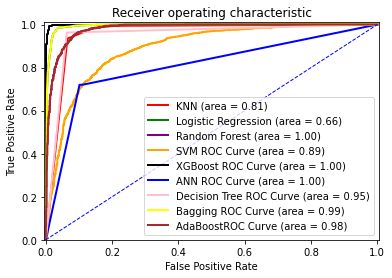

In [246]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr_KNN, tpr_KNN, color='red', lw=2, 
         label='KNN (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='Logistic Regression (area = %0.2f)' % AUC2)

# Roc Curve3:
plt.plot(fpr3, tpr3, color='purple', lw=2, 
         label='Random Forest (area = %0.2f)' % AUC3)

# Roc Curve for SVM:
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, 
         label='SVM ROC Curve (area = %0.2f)' % AUC_SVM)
# Roc Curve for XGBoost:
plt.plot(fpr_XGBoost, tpr_XGBoost, color='black', lw=2, 
         label='XGBoost ROC Curve (area = %0.2f)' % AUC_XGBoost)
# Roc Curve for ANN:
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ANN ROC Curve (area = %0.2f)' % AUC_XGBoost)

#Decision Tree
plt.plot(fpr1, tpr1, color='pink', lw=2, label='Decision Tree ROC Curve (area = %0.2f)' % AUC_DecisionTree)
#Bagging
plt.plot(fpr2, tpr2, color='yellow', lw=2, label='Bagging ROC Curve (area = %0.2f)' % AUC_Bagging)
#AdaBoost
plt.plot(fpr3, tpr3, color='brown', lw=2, label='AdaBoostROC Curve (area = %0.2f)' % AUC_AdaBoost)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
    
# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()